In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 데이터 소수점 지정
pd.options.display.precision = 2

# 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'


# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv('add_variable_customer.csv', encoding='euc-kr')

In [4]:
df_raw.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30,Yes,No,0,Yes,2,Yes,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,남성,46,40,No,No,0,No,0,No,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
2,C-10003,남성,50,50,No,No,0,No,0,Yes,...,1,0,38080,152100,4,98180.00,490900,643000,38025,0
3,C-10004,남성,78,70,Yes,No,0,Yes,1,Yes,...,1,0,31410,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,여성,75,70,Yes,No,0,Yes,3,Yes,...,1,0,8360,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20,No,No,0,No,0,No,...,4,0,52770,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,남성,40,40,Yes,No,0,Yes,1,Yes,...,1,0,18310,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,남성,22,20,No,No,0,No,0,Yes,...,5,0,21020,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,남성,21,20,No,No,0,Yes,5,No,...,3,0,2370,160460,79,80107.59,6328500,6488960,2031,0


우리의 잠재고객 층!!

In [174]:
pros_cust_lst = df_raw[(df_raw['SatisScore'] >= 3) & (df_raw['ChurnScore'] >= 65) & (df_raw['ChurnScore'] <=80) & (df_raw['ChurnLabel']==0)]['CustomerId']

In [175]:
pros_cust_lst

0       C-10001
1       C-10002
22      C-10023
25      C-10027
28      C-10030
         ...   
6846    C-17027
6849    C-17030
6850    C-17031
6853    C-17034
6854    C-17035
Name: CustomerId, Length: 1381, dtype: object

##### @Gender : 여성(1), 남성(0)

In [6]:
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)

##### @Married : Yes(1), No(0)

In [7]:
df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)

##### @Referrals : Yes(1), No(0)

In [8]:
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)

##### @Dependents: Yes(1), No(0)

In [9]:
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)

##### @PaperlessBilling  : Yes(1), No(0)

In [10]:
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)

##### @PaymentMethod

In [11]:
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)

##### @OnlineSecurity

In [12]:
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)

##### @OnlineBackup  : Yes(1), No(0)

In [13]:
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)

##### @TechSupport  : Yes(1), No(0)

In [14]:
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)

##### @UnlimitedData : Yes(1), No(0)

In [15]:
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

# DT

In [16]:
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report


In [187]:
# df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
# df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [17]:
df_raw.drop(['CustomerId', 'StartDate', 'EndDate',
             'EndDateTmp', 'ChurnCategory', 'ChurnReason', 'SatisScore', 'ChurnScore'], axis=1, inplace=True)

## 데이터 분할

In [18]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop('ChurnLabel', axis=1, inplace=False)
df_raw_y = df_raw['ChurnLabel']


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size=0.35, random_state=42)

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                6863 non-null   int64  
 1   Age                   6863 non-null   int64  
 2   AgeGroup              6863 non-null   int64  
 3   Married               6863 non-null   int64  
 4   Dependents            6863 non-null   int64  
 5   noDependents          6863 non-null   int64  
 6   Referrals             6863 non-null   int64  
 7   noReferrals           6863 non-null   int64  
 8   PaperlessBilling      6863 non-null   int64  
 9   PaymentMethod         6863 non-null   int64  
 10  OnlineSecurity        6863 non-null   int64  
 11  OnlineBackup          6863 non-null   int64  
 12  TechSupport           6863 non-null   int64  
 13  UnlimitedData         6863 non-null   int64  
 14  AvgDownloadGB         6863 non-null   int64  
 15  ChurnLabel           

In [20]:
print('분할 전 설명변수 데이터: ', df_raw_x.shape)
print('분할 후 설명변수 데이터 \ntrain : ', df_train_x.shape, ' test: ', df_test_x.shape)

분할 전 설명변수 데이터:  (6863, 25)
분할 후 설명변수 데이터 
train :  (4460, 25)  test:  (2403, 25)


In [21]:
tree_uncustomized = DecisionTreeClassifier(random_state=42 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도å
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.945


In [22]:
v_feature_name = df_train_x.columns

In [23]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
19,TenureMonths,5.01e-01
23,MonthRoamCharge,2.29e-01
17,AvgRoamCharge,1.13e-01
20,AvgCharge,5.40e-02
14,AvgDownloadGB,1.50e-02
15,CustomerLTV,1.40e-02
22,TotalRevenue,1.30e-02
1,Age,1.20e-02
21,TotalCharge,7.00e-03
7,noReferrals,5.00e-03


Text(0, 0.5, '설명변수')

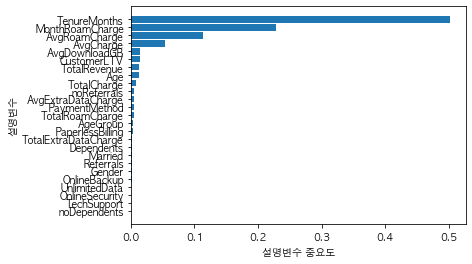

In [24]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [25]:
# 평가
y_pred = tree_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncustomized.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균a형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.945

Confusion matrix: 
[[1731   59]
 [  73  540]]
              precision    recall  f1-score   support

           0      0.960     0.967     0.963      1790
           1      0.902     0.881     0.891       613

    accuracy                          0.945      2403
   macro avg      0.931     0.924     0.927      2403
weighted avg      0.945     0.945     0.945      2403



In [31]:
tree_uncustomized.predict_proba(df_test_x[:20])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth *0.1 for depth in range(40, 101)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [40]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,4.0,0.90,0.90
1,4.1,0.90,0.90
2,4.2,0.90,0.90
3,4.3,0.90,0.90
4,4.4,0.90,0.90
5,4.5,0.90,0.90
6,4.6,0.90,0.90
7,4.7,0.90,0.90
8,4.8,0.90,0.90
9,4.9,0.90,0.90


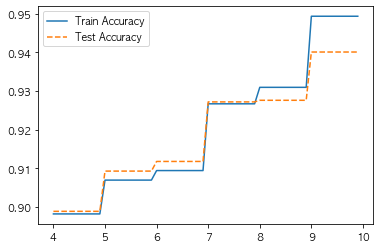

In [41]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [43]:
max_depth = 10

In [44]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 3 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = max_depth, random_state=42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [45]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,3,0.95,0.94
1,6,0.95,0.94
2,9,0.95,0.94
3,12,0.95,0.94
4,15,0.95,0.94
5,18,0.95,0.94
6,21,0.95,0.94
7,24,0.95,0.94
8,27,0.95,0.94
9,30,0.95,0.94


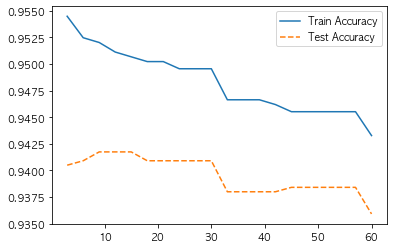

In [46]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

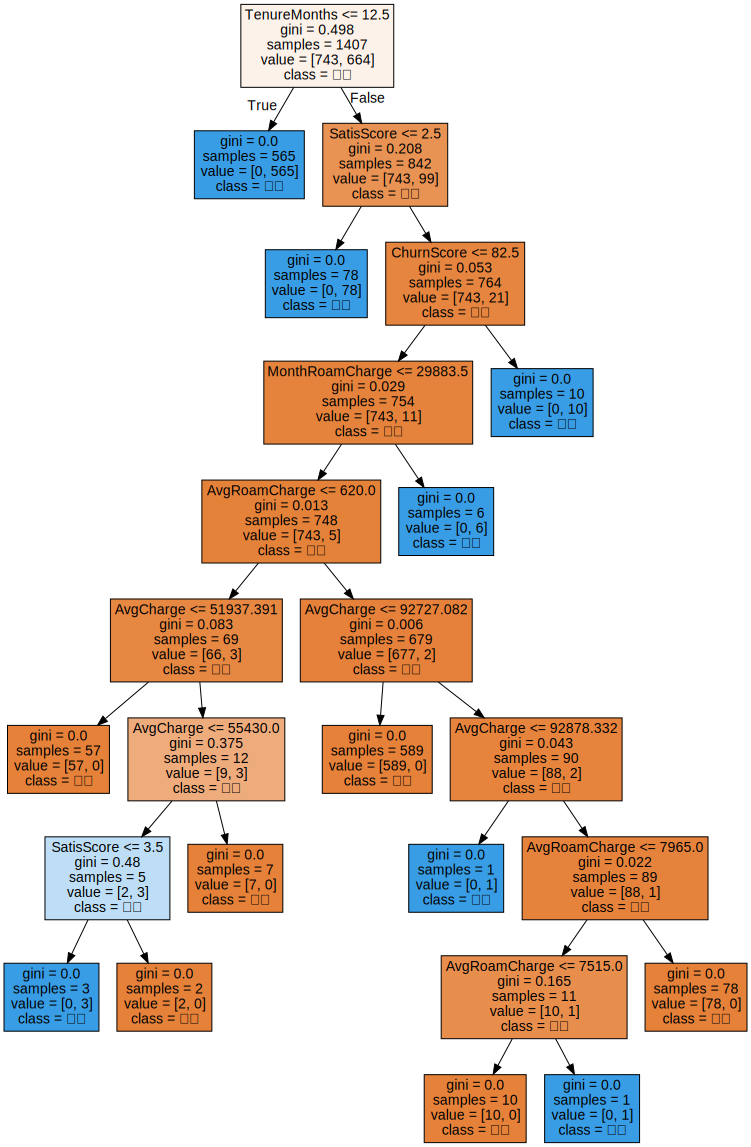

In [65]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_uncustomized, out_file="tree_uncustomized.dot", class_names = ["유지", "이탈"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_uncustomized.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [82]:
df_raw.iloc[0]

Gender                  1.00e+00
Age                     3.70e+01
AgeGroup                3.00e+01
Married                 1.00e+00
Dependents              0.00e+00
noDependents            0.00e+00
Referrals               1.00e+00
noReferrals             2.00e+00
PaperlessBilling        1.00e+00
PaymentMethod           1.00e+00
OnlineSecurity          0.00e+00
OnlineBackup            1.00e+00
TechSupport             1.00e+00
UnlimitedData           1.00e+00
AvgDownloadGB           1.60e+01
ChurnLabel              0.00e+00
ChurnScore              6.50e+01
CustomerLTV             2.20e+03
SatisScore              3.00e+00
TotalExtraDataCharge    0.00e+00
AvgRoamCharge           4.79e+04
TotalRoamCharge         4.31e+05
TenureMonths            2.10e+01
AvgCharge               8.36e+04
TotalCharge             1.76e+06
TotalRevenue            2.19e+06
MonthRoamCharge         2.05e+04
AvgExtraDataCharge      0.00e+00
Name: 0, dtype: float64

In [84]:
tree_uncustomized.predict_proba([[ 1, 37, 30, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 16, 0, 65, 2200, 3, 47900, 431000, 21, 83600, 1760000, 2190000, 20500, 0 ]])

array([[1., 0.]])

# XGBoost

In [67]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))


In [68]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier()

xgboost_uncust

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [69]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)

[04:16:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 모델 생성 및 평가 : Train 

오차행렬:
 [[743   0]
 [  0 664]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[394   1]
 [  2 362]] 

정확도: 0.9960
정밀도: 0.9972
재현율: 0.9945
F1    : 0.9959
AUC   : 0.9960


In [70]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


[04:17:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 사용자 모델 평가 : Train 

오차행렬:
 [[743   0]
 [  0 664]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       664

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407


 사용자 모델 평가 : Test 

오차행렬:
 [[395   0]
 [  3 361]] 

정확도: 0.9960
정밀도: 1.0000
재현율: 0.9918
F1    : 0.9959
AUC   : 0.9959

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       395
           1       1.00      0.99    

In [71]:
# sklearn XGBoost 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# max_depth, learning_rate(학습률), 반복횟수 등 지정
# 오류함수의 평가지표:logloss
# 조기중단을 위한 최소 반복횟수는 150

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6)

eval_df = [(df_test_x, df_test_y)]

xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, 
                eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.60079
[1]	validation_0-logloss:0.52504
[2]	validation_0-logloss:0.46183
[3]	validation_0-logloss:0.40840
[4]	validation_0-logloss:0.36276
[5]	validation_0-logloss:0.32348
[6]	validation_0-logloss:0.28945
[7]	validation_0-logloss:0.25980
[8]	validation_0-logloss:0.23386
[9]	validation_0-logloss:0.21108
[10]	validation_0-logloss:0.19101
[11]	validation_0-logloss:0.17329
[12]	validation_0-logloss:0.15768
[13]	validation_0-logloss:0.14383
[14]	validation_0-logloss:0.13152
[15]	validation_0-logloss:0.12056
[16]	validation_0-logloss:0.11083
[17]	validation_0-logloss:0.10192
[18]	validation_0-logloss:0.09416
[19]	validation_0-logloss:0.08701
[20]	validation_0-logloss:0.08047
[21]	validation_0-logloss:0.07472
[22]	validation_0-logloss:0.06941
[23]	validation_0-logloss:0.06425
[24]	validation_0-logloss:0.05964
[25]	validation_0-logloss:0.05544
[26]	validation_0-logloss:0.05163
[27]	validation_0-logloss:0.04822
[28]	validation_0-logloss:0.04537
[29]	validation_0-loglos

[238]	validation_0-logloss:0.01000
[239]	validation_0-logloss:0.01001
[240]	validation_0-logloss:0.00999
[241]	validation_0-logloss:0.00998
[242]	validation_0-logloss:0.00999
[243]	validation_0-logloss:0.00999
[244]	validation_0-logloss:0.00997
[245]	validation_0-logloss:0.00997
[246]	validation_0-logloss:0.00998
[247]	validation_0-logloss:0.00994
[248]	validation_0-logloss:0.00995
[249]	validation_0-logloss:0.00995
[250]	validation_0-logloss:0.00993
[251]	validation_0-logloss:0.00992
[252]	validation_0-logloss:0.00990
[253]	validation_0-logloss:0.00989
[254]	validation_0-logloss:0.00990
[255]	validation_0-logloss:0.00990
[256]	validation_0-logloss:0.00988
[257]	validation_0-logloss:0.00988
[258]	validation_0-logloss:0.00989
[259]	validation_0-logloss:0.00985
[260]	validation_0-logloss:0.00985
[261]	validation_0-logloss:0.00986
[262]	validation_0-logloss:0.00985
[263]	validation_0-logloss:0.00983
[264]	validation_0-logloss:0.00983
[265]	validation_0-logloss:0.00984
[266]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
# 조기 중단 예측 및 모델 평가:Test  
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[395   0]
 [  2 362]] 

정확도: 0.9974
정밀도: 1.0000
재현율: 0.9945
F1    : 0.9972
AUC   : 0.9973

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       395
           1       1.00      0.99      1.00       364

    accuracy                           1.00       759
   macro avg       1.00      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

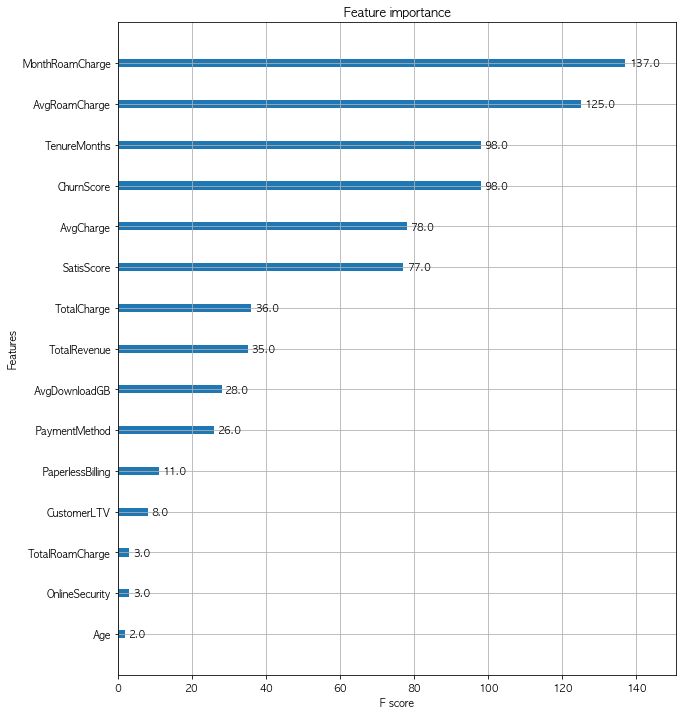

In [73]:
# 변수 중요도 확인 
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_stop, ax=ax)

# importance_type 변경 가능
# plot_importance(xgb_stop, importance_type='gain', ax=ax)

# SVM모델

In [88]:
df_raw = pd.read_csv('add_variable_customer.csv', encoding='euc-kr')
df_raw.drop('Unnamed: 0', axis = 1, inplace=True)

df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,C-10001,여성,37,30,Yes,No,0,Yes,2,Yes,...,3,0,47910,431100,21,83590.48,1755400,2186500,20528,0
1,C-10002,남성,46,40,No,No,0,No,0,No,...,5,11300,12090,108710,21,68928.57,1447500,1567510,5176,538
2,C-10003,남성,50,50,No,No,0,No,0,Yes,...,1,0,38080,152100,4,98180.00,490900,643000,38025,0
3,C-10004,남성,78,70,Yes,No,0,Yes,1,Yes,...,1,0,31410,408720,13,112742.86,1578400,1987120,31440,0
4,C-10005,여성,75,70,Yes,No,0,Yes,3,Yes,...,1,0,8360,24970,3,94500.00,378000,402970,8323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,여성,20,20,No,No,0,No,0,No,...,4,0,52770,685680,25,64428.00,1610700,2296380,27427,0
6859,C-17040,남성,40,40,Yes,No,0,Yes,1,Yes,...,1,0,18310,402730,22,101891.30,2343500,2746230,18305,0
6860,C-17041,남성,22,20,No,No,0,No,0,Yes,...,5,0,21020,42040,14,56600.00,792400,834440,3002,0
6861,C-17042,남성,21,20,No,No,0,Yes,5,No,...,3,0,2370,160460,79,80107.59,6328500,6488960,2031,0


In [89]:
##### @Gender : 여성(1), 남성(0)

df_raw['Gender'] = df_raw['Gender'].replace(to_replace='여성', value=1)
df_raw['Gender'] = df_raw['Gender'].replace(to_replace='남성', value=0)

##### @Married : Yes(1), No(0)

df_raw['Married'] = df_raw['Married'].replace(to_replace='Yes', value=1)
df_raw['Married'] = df_raw['Married'].replace(to_replace='No', value=0)

##### @Referrals : Yes(1), No(0)

df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='Yes', value=1)
df_raw['Referrals'] = df_raw['Referrals'].replace(to_replace='No', value=0)

##### @Dependents: Yes(1), No(0)

df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='Yes', value=1)
df_raw['Dependents'] = df_raw['Dependents'].replace(to_replace='No', value=0)

##### @PaperlessBilling  : Yes(1), No(0)

df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='Yes', value=1)
df_raw['PaperlessBilling'] = df_raw['PaperlessBilling'].replace(to_replace='No', value=0)

##### @PaymentMethod

df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='신용카드', value=1)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='계좌이체', value=0)
df_raw['PaymentMethod'] = df_raw['PaymentMethod'].replace(to_replace='이체/메일확인', value=2)

##### @OnlineSecurity

df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='Yes', value=1)
df_raw['OnlineSecurity'] = df_raw['OnlineSecurity'].replace(to_replace='No', value=0)

##### @OnlineBackup  : Yes(1), No(0)

df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='Yes', value=1)
df_raw['OnlineBackup'] = df_raw['OnlineBackup'].replace(to_replace='No', value=0)

##### @TechSupport  : Yes(1), No(0)

df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='Yes', value=1)
df_raw['TechSupport'] = df_raw['TechSupport'].replace(to_replace='No', value=0)

##### @UnlimitedData : Yes(1), No(0)

df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='Yes', value=1)
df_raw['UnlimitedData'] = df_raw['UnlimitedData'].replace(to_replace='No', value=0)

In [90]:
df_raw['StartDate'] = pd.to_datetime(df_raw['StartDate'])
df_raw = df_raw[(df_raw["StartDate"].dt.year>=2020)]

In [91]:
df_raw.drop(['CustomerId',  'EndDate', 'PaymentMethod', 'StartDate',
             'EndDateTmp', 'ChurnCategory', 'ChurnReason'], axis=1, inplace=True)

In [92]:
# 변수명 저장
v_feature_names = df_raw.columns
# StandardScaler 적용
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_raw)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,OnlineSecurity,...,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,TenureMonths,AvgCharge,TotalCharge,TotalRevenue,MonthRoamCharge,AvgExtraDataCharge
0,1.0,0.28,0.17,1.0,0.0,0.0,1.0,0.2,1.0,0.0,...,0.5,0.00,0.85,0.35,0.87,0.52,0.57,0.55,0.36,0.00e+00
1,0.0,0.43,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.07,0.21,0.09,0.87,0.40,0.47,0.39,0.09,5.95e-03
2,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.00,0.67,0.12,0.13,0.65,0.15,0.15,0.68,0.00e+00
3,0.0,0.97,0.83,1.0,0.0,0.0,1.0,0.1,1.0,0.0,...,0.0,0.00,0.56,0.33,0.52,0.77,0.51,0.50,0.56,0.00e+00
4,1.0,0.92,0.83,1.0,0.0,0.0,1.0,0.3,1.0,0.0,...,0.0,0.00,0.15,0.02,0.09,0.61,0.11,0.09,0.15,0.00e+00


In [93]:
# 설명변수, 목표변수 데이터 지정
df_raw_x = df_scaled.drop("ChurnLabel", axis = 1, inplace = False)
df_raw_y = df_scaled["ChurnLabel"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 42)  # random state

In [95]:
svm_uncustomized = SVC(random_state=42)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.997
Accuracy on test set: 0.992


In [110]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10)
# para_c = [10 **c for c in range(-2, 3)]
para_c = [100 **c for c in range(-2, 4)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 42)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [111]:
para_c

[0.0001, 0.01, 1, 100, 10000, 1000000]

In [112]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.00,0.52,0.53
1,0.01,0.93,0.93
2,1.00,1.00,0.99
3,100.00,1.00,0.99
4,10000.00,1.00,0.99
5,1000000.00,1.00,0.99


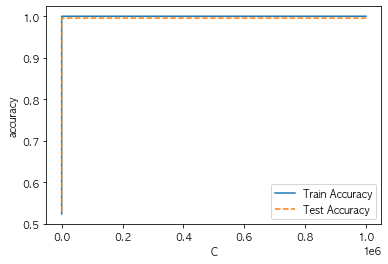

In [113]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [124]:
cost = 100

In [126]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [1000 **gamma for gamma in range(-2, 6)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = cost, random_state = 42)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [127]:
para_gamma

[1e-06, 0.001, 1, 1000, 1000000, 1000000000, 1000000000000, 1000000000000000]

In [117]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.00e+00,0.52,0.53
1,1.00e-03,0.97,0.98
2,1.00e+00,1.00,0.99
3,1.00e+03,1.00,0.53
4,1.00e+06,1.00,0.53
5,1.00e+09,1.00,0.53
6,1.00e+12,1.00,0.53
7,1.00e+15,1.00,0.53


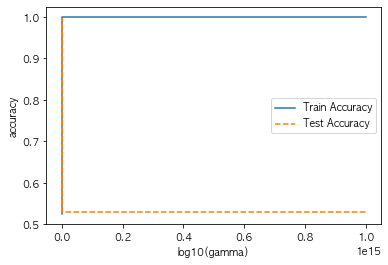

In [128]:
import numpy as np
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("log10(gamma)")
plt.legend()

In [129]:
gamma=0.001

##### @SVM 최종

In [130]:
# 최종 모델
svc_final = SVC(gamma = gamma, C = cost, random_state=42)
svc_final.fit(df_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.996
Accuracy on test set: 0.994

Confusion matrix: 
[[344   0]
 [  4 302]]
              precision    recall  f1-score   support

         0.0      0.989     1.000     0.994       344
         1.0      1.000     0.987     0.993       306

    accuracy                          0.994       650
   macro avg      0.994     0.993     0.994       650
weighted avg      0.994     0.994     0.994       650



In [121]:
estimator = SVC(random_state=42)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
              "gamma": para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=10000, gamma=0.001, random_state=42)

best parameter: 
{'C': 10000, 'gamma': 0.001}

best score: 
0.997


In [123]:
# 최종 모델
svc_gv = SVC(gamma = 0.001, C = 10000, random_state=42)
svc_gv.fit(df_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.975
Accuracy on test set: 0.982

Confusion matrix: 
[[343   1]
 [ 11 295]]
              precision    recall  f1-score   support

         0.0      0.969     0.997     0.983       344
         1.0      0.997     0.964     0.980       306

    accuracy                          0.982       650
   macro avg      0.983     0.981     0.981       650
weighted avg      0.982     0.982     0.982       650



# NN분류

In [135]:
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

In [140]:
df_raw_x = df_scaled.drop('ChurnLabel', axis=1, inplace=True)
df_raw_y = df_scaled['ChurnLabel']

TypeError: drop() got an unexpected keyword argument 'axi'

In [136]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 42)  # random state

In [137]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_raw_x, test_size = 0.3,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (1516, 26)
train data Y size : (650, 26)


In [139]:
nn_scaled = MLPClassifier(random_state=42)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.747
Accuracy on test set: 0.511
